### Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Scikit learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Import Accuracy Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Pickle To Save And Load Models
import pickle
from sklearn.externals import joblib

### Global Variables

In [ ]:
# Create Global Variables If Necessay
projectName = '<PROJECT NAME>'
datasetPath = '<DATASET PATH>'
modelSavePath = '<PROJECT MODEL PATH>'

### Custom Functions

In [ ]:
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Preprocessing

In [ ]:
dataset = pd.read_csv(datasetPath + 'Data.csv')
df = dataset
df.info()

#CHECK FOR NAN VALUE IN THE DATA FRAME
df.isnull().sum()

#REMOVING NAN VALUES FROM THE DATASET
from sklearn.impute import SimpleImputer as Im
imputer = Im(missing_values = np.nan, strategy = "mean")
imputer = imputer.fit(df.iloc[:, 9:11])
df.iloc[:, 9:11] = imputer.transform(df.iloc[:, 9:11])

#ENCODING CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['Product_ID'] = labelencoder_df.fit_transform(df['Product_ID'])
df['Gender'] = labelencoder_df.fit_transform(df['Gender']) #Converting Gender To Numerical
df['Age'] = labelencoder_df.fit_transform(df['Age']) #Converting Age To Numerical
df['City_Category'] = labelencoder_df.fit_transform(df['City_Category']) #Converting City_Category To Numerical
df['Stay_In_Current_City_Years'] = labelencoder_df.fit_transform(df['Stay_In_Current_City_Years']) #Converting Stay_In_Current_City_Years To Numerical
df['Product_Category_1'] = labelencoder_df.fit_transform(df['Age'])
df['Product_Category_2'] = labelencoder_df.fit_transform(df['Product_Category_2'].astype('int'))
df['Product_Category_3'] = labelencoder_df.fit_transform(df['Product_Category_3'].astype('int'))

#ONEHOT ENCODING OF CATEGORICAL DATA
df = pd.get_dummies(df, columns=["Gender"], prefix=["Gender"])
df = pd.get_dummies(df, columns=["Age"], prefix=["Age"])
df = pd.get_dummies(df, columns=["City_Category"], prefix=["City_Category"])
df = pd.get_dummies(df, columns=["Stay_In_Current_City_Years"], prefix=["Stay_In_Current_City_Years"])

#PLOT CORRELATION MATRIX AND GRAPH TO FIND DEPENDENT VARIABLES
cor_mat = df.corr()
plot_corr(df)

#DROPPING UNWANTED COLUMNS
df.drop(['User_ID','Product_ID','Product_Category_2','Product_Category_3'], axis=1, inplace=True)

### Feature Selection Using Pearson Correlation

In [11]:
# DROPPING UNWANTED COLUMNS
df.drop(['Id'], axis=1, inplace=True)

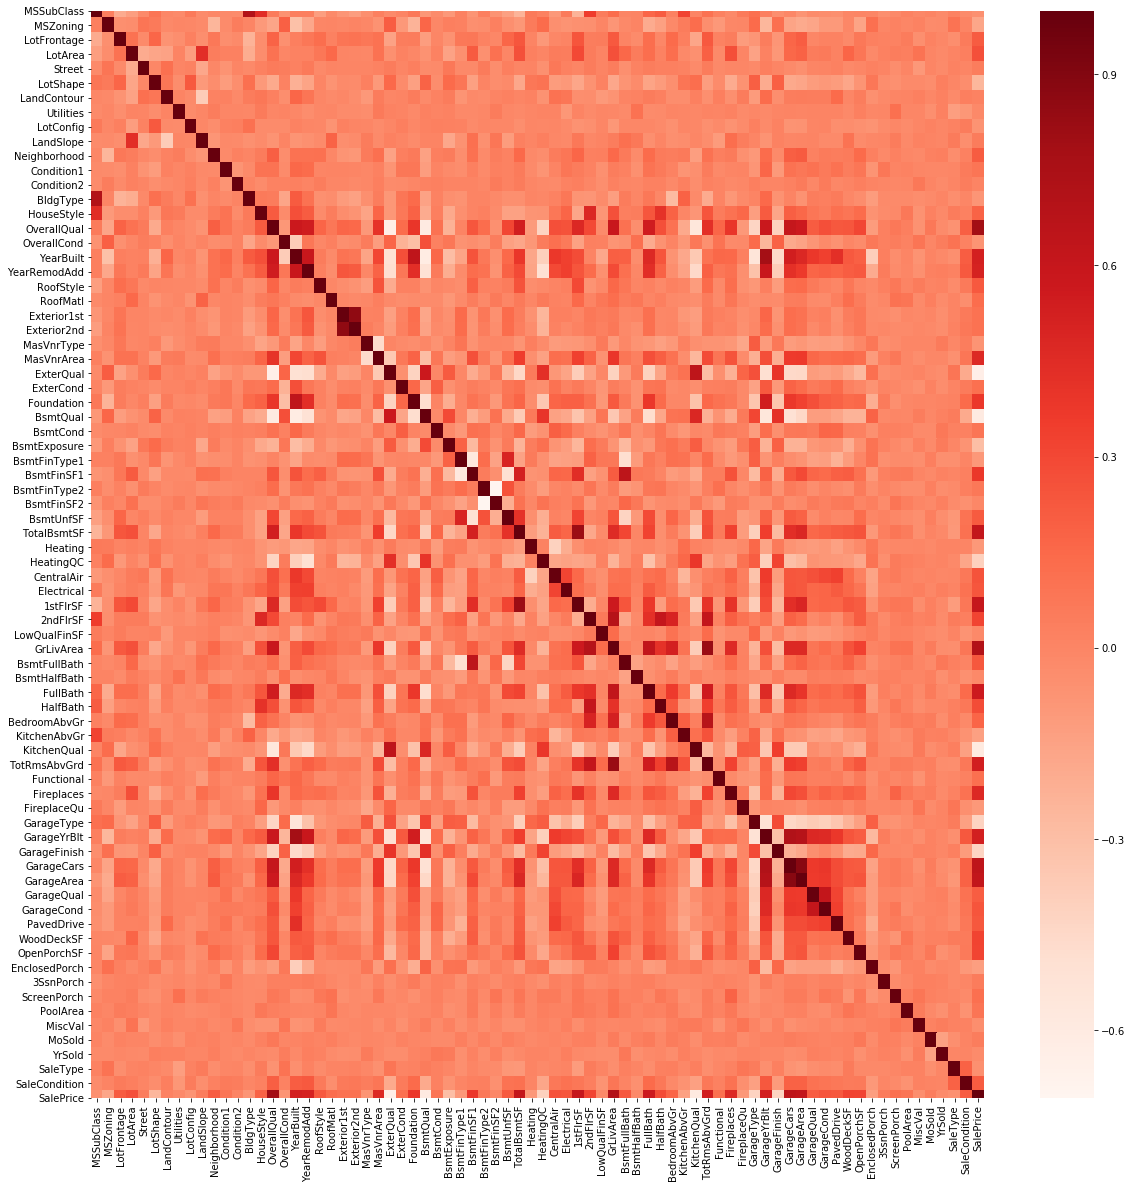

In [13]:
# Compute Pearson Correlation
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor['SalePrice'])

# Plot Correlation Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
print(relevant_features)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
ExterQual       0.636884
Foundation      0.382479
BsmtQual        0.593734
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
HeatingQC       0.400178
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
KitchenQual     0.589189
TotRmsAbvGrd    0.534591
Fireplaces      0.466929
GarageType      0.415283
GarageYrBlt     0.527527
GarageFinish    0.425684
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64


### Create Testing and Training Data

In [ ]:
#SEPERATE LABEL COLUMN FROM FEATURE COLUMNS
df_label = df['Purchase'].values
df.drop(['Purchase'], axis=1, inplace=True)
df_feature = df.values

df5k_feature = df_feature[0:5000, :]
df5k_label = df_label[0:5000]

#SPLIT TRAINING SET AND TESTING SET
from sklearn.model_selection._split import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(df5k_feature, df5k_label, test_size=0.20)

### Data Modeling

In [ ]:
#NAIVE BAYESIAN
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
clf = GaussianNB()
clf1 = MultinomialNB()
clf2 = BernoulliNB()
clf.fit(feature_train,label_train)
clf1.fit(feature_train,label_train)
clf2.fit(feature_train,label_train)
predicted_values_GB = clf.predict(feature_test)
predicted_values_NB = clf1.predict(feature_test)
predicted_values_BB = clf2.predict(feature_test)

#GRADIENT BOOSTING ALGORITHM
#from sklearn.ensemble import GradientBoostingClassifier
#model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#model.fit(feature_train, label_train)
#predicted_values_GBA = model.predict(feature_test)

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(feature_train,label_train)
model_LR.score(feature_train,label_train)
#Equation coefficient and Intercept
print('Coefficient: \n', model_LR.coef_)
print('Intercept: \n', model_LR.intercept_)
predicted_values_LR = model_LR.predict(feature_test)

#SVM (SUPPORT VECTOR MACHINE)
from sklearn import svm 
model_svm = svm.SVC()
model_svm.fit(feature_train,label_train)
model_svm.score(feature_train,label_train)
predicted_values_svm = model_svm.predict(feature_test)

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(feature_train,label_train)
predicted_values_RF = model_RF.predict(feature_test)

#LINEAR REGRESSION
#from sklearn.linear_model import LinearRegression
#clf = LinearRegression()
#clf.fit(feature_train,label_train)
#predicted_values_LG = clf.predict(feature_test)

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(feature_train,label_train)
predicted_values_DT = clf.predict(feature_test)

#K-NN
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(feature_train,label_train)
predicted_values_KNN = clf.predict(feature_test)

### Meassure Accuracy

#### Accuracy For Classification Model

In [ ]:
accuracy = dict()
accuracy['Gaussian'] = accuracy_score(predicted_values_GB,label_test)*100
accuracy['MultinomialNB'] = accuracy_score(predicted_values_NB,label_test)*100
accuracy['BernoulliNB'] = accuracy_score(predicted_values_BB,label_test)*100
#accuracy['GBA'] = accuracy_score(predicted_values_GBA,label_test)*100
accuracy['LogisticReression'] = accuracy_score(predicted_values_LR,label_test)*100
accuracy['SVM'] = accuracy_score(predicted_values_svm,label_test)*100
accuracy['RandomForest'] = accuracy_score(predicted_values_RF,label_test)*100
#accuracy['LinearRegression'] = accuracy_score(predicted_values_LG,label_test)*100
accuracy['DecisionTree'] = accuracy_score(predicted_values_DT,label_test)*100
accuracy['KNN'] = accuracy_score(predicted_values_KNN,label_test)*100
accuracy['Max_accuracy'] = 100
accuracy=pd.DataFrame(list(accuracy.items()),columns=['Algorithm','Accuracy'])
print(accuracy)
sns.lineplot(x='Algorithm',y='Accuracy',data=accuracy)

#### Accuracy For Classification Model

In [30]:
# Meassure Accuracy Using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_LinerRegression = sqrt(mean_squared_error(label_test, predicted_values_LinerRegression))
rmse_LogisticRegression = sqrt(mean_squared_error(label_test, predicted_values_LogisticRegression))

print(rmse_LinerRegression)
print(rmse_LogisticRegression)

32768.35005467443
60657.376207854824


### Plot Accuracy

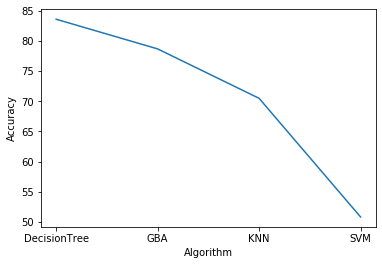

In [14]:
sns.lineplot(x='Algorithm',y='Accuracy',data=accuracy)

### Plot Actual Vs Predicted Data

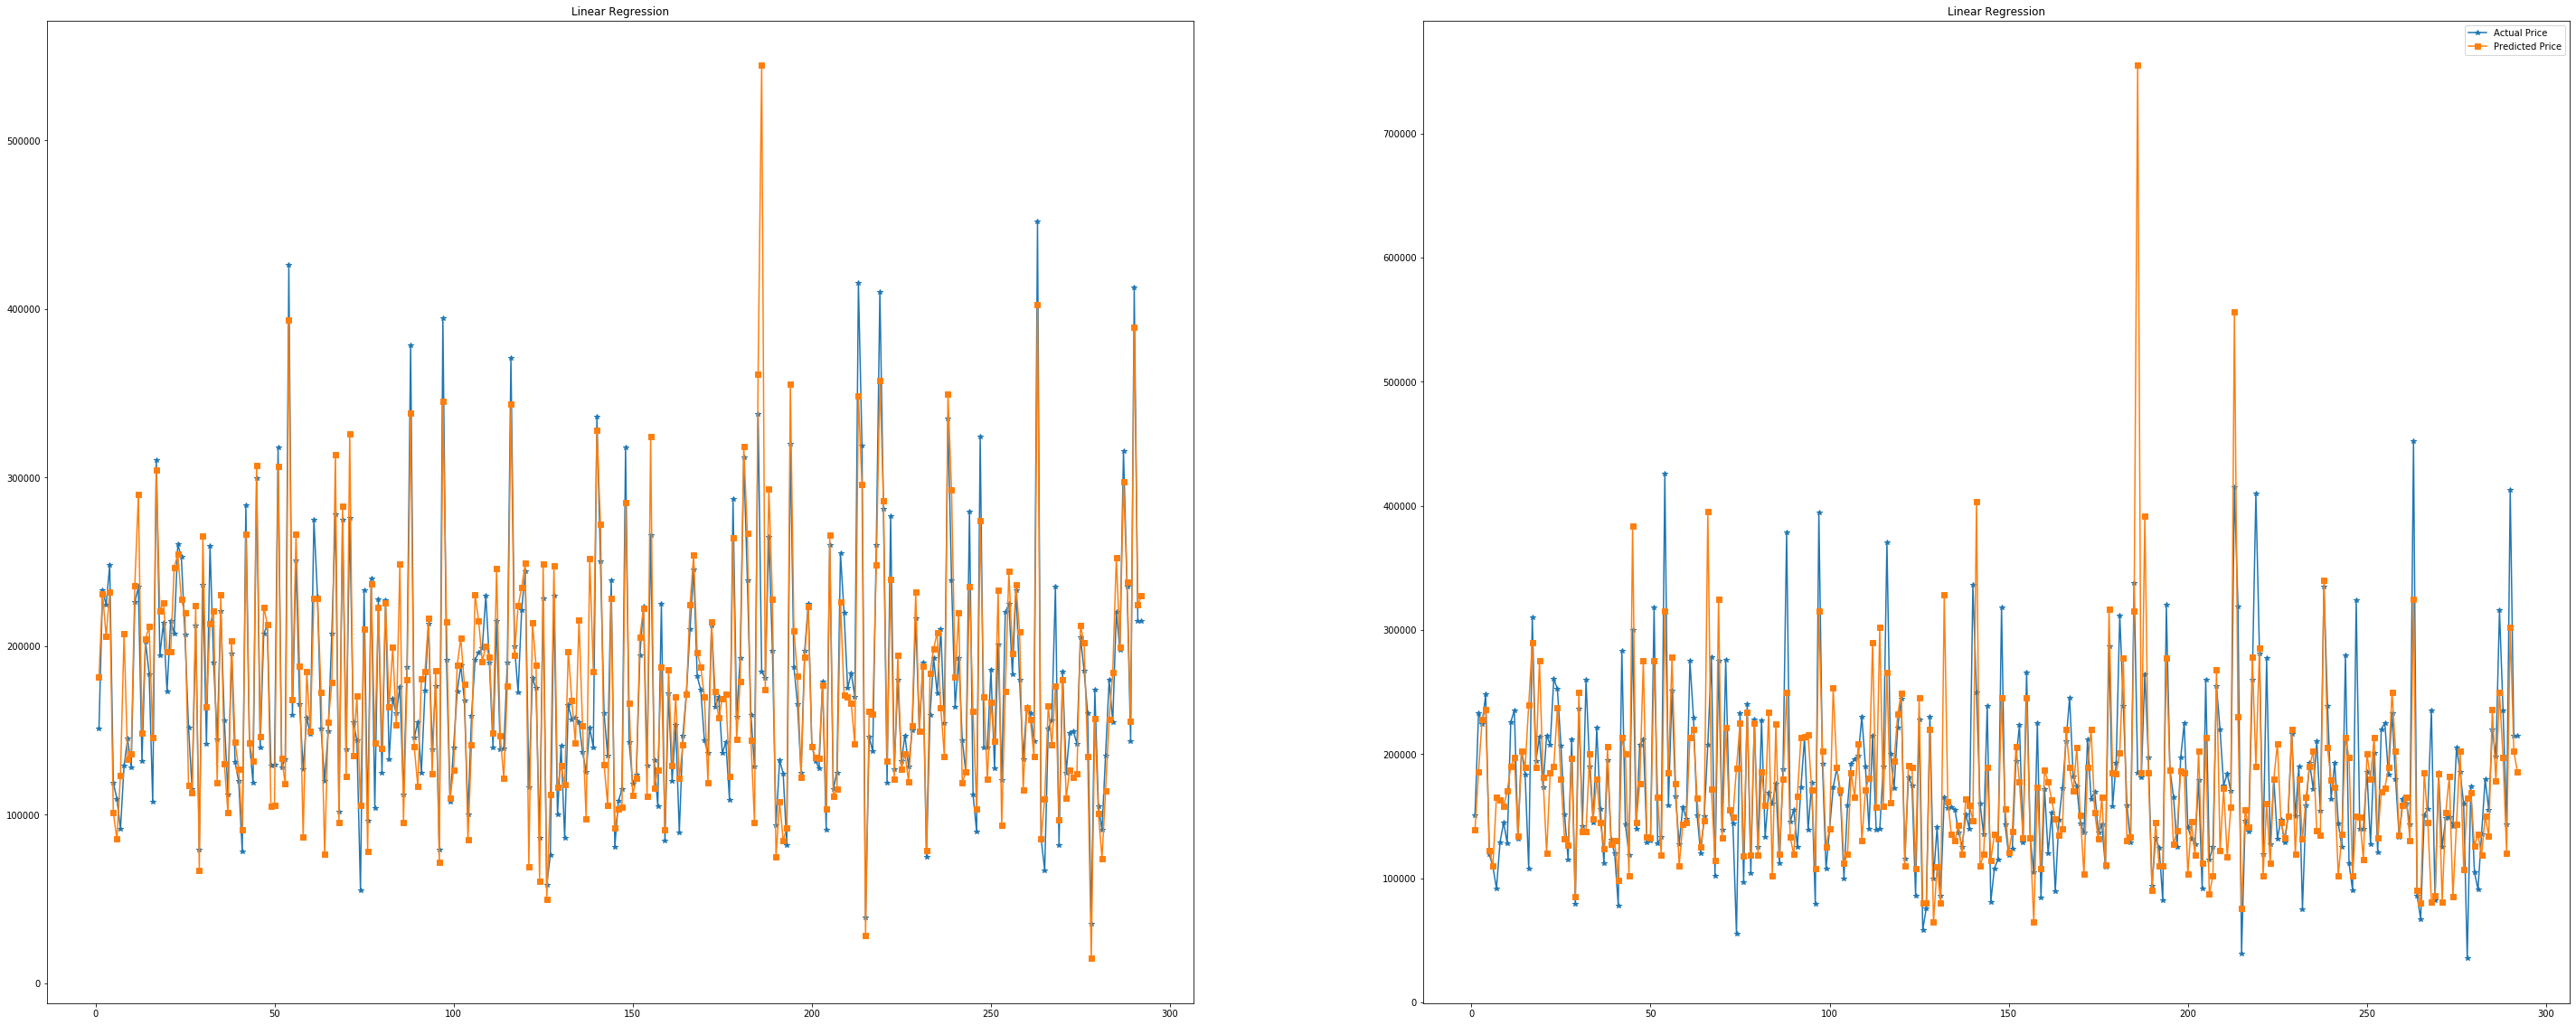

In [36]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (50,20))
x = np.arange(1,len(label_test)+1)
ax1.plot(x, label_test, marker = '*', label = 'Actual Price')
ax1.plot(x, predicted_values_LinerRegression, marker = 's' , label = 'Predicted Price')
ax1.set_title('Linear Regression')

ax2.plot(x, label_test, marker = '*', label = 'Actual Price')
ax2.plot(x, predicted_values_LogisticRegression, marker = 's' , label = 'Predicted Price')
ax2.set_title('Linear Regression')

plt.legend()
plt.show()

### Save Model

In [21]:
# Save The Models Performing Well As A Pickle String. 
save_Model_DT = pickle.dumps(model_DT)
save_Model_KNN = pickle.dumps(model_KNN)
save_Model_GB = pickle.dumps(model_GB)

# Save The Pickle Model In A File 
joblib.dump(save_Model_DT, modelSavePath + projectName + '_DecisionTreeModel.pkl')
joblib.dump(model_KNN, modelSavePath + projectName + '_KNNModel.pkl')
joblib.dump(model_GB, modelSavePath + projectName + '_GradientBoostModel.pkl')

['D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HeatDiseasePredictor/HeartDisease_GradientBoostModel.pkl']

### Make Single Predictions

In [23]:
# Load the pickled model 
load_Model_DT = joblib.load(modelSavePath + projectName + '_DecisionTreeModel.pkl')
load_Model_KNN = joblib.load(modelSavePath + projectName + '_KNNModel.pkl')
load_Model_GB = joblib.load(modelSavePath + projectName + '_GradientBoostModel.pkl')
  
# Use the loaded pickled model to make predictions 
#load_Model_DT.predict(X_test)